In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'cardiovascular_dataset.csv', sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

First look at heatmap

<AxesSubplot:>

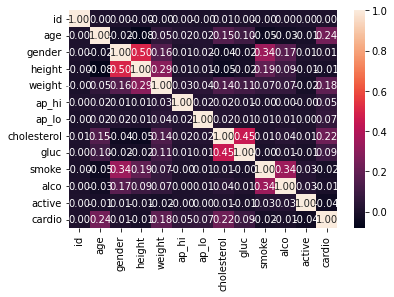

In [6]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Age is represented as days, needs to be converted.

In [7]:
df['age'] = round(df['age']/365.25,2)

In [8]:
df.duplicated().sum()

0

Splitting of gender table into male and female.

In [9]:
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

In [10]:
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [11]:
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.302869,0.650429,0.349571,164.359229,74.205690,27.556545,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.754974,0.476838,0.476838,8.210126,14.395757,6.091405,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.560000,0.000000,0.000000,55.000000,10.000000,3.470000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.360000,0.000000,0.000000,159.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.940000,1.000000,0.000000,165.000000,72.000000,26.375000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,82.000000,30.220000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,250.000000,200.000000,298.670000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Drop of BMI value above 60 and below 15 since these would be considered either children or obese and would not represent the in general bmi.

In [12]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

Categorization of blood pressure results.

In [13]:
def bp_categorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None

df.insert(8, "bp_cat", df.apply(lambda row: bp_categorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

normal      39008
high 1      15380
high 2      15023
elevated      419
high 3         77
Name: bp_cat, dtype: int64

Drop of extreme blood pressure cases since they do not represent the mainstream values.

In [14]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [15]:
df.head

<bound method NDFrame.head of          age  female  male  height  weight    bmi  ap_hi  ap_lo  bp_cat  \
0      50.36       0     1     168    62.0  21.97    110     80  normal   
1      55.38       1     0     156    85.0  34.93    140     90  high 2   
2      51.63       1     0     165    64.0  23.51    130     70  high 1   
3      48.25       0     1     169    82.0  28.71    150    100  high 2   
4      47.84       1     0     156    56.0  23.01    100     60  normal   
...      ...     ...   ...     ...     ...    ...    ...    ...     ...   
69995  52.68       0     1     168    76.0  26.93    120     80  normal   
69996  61.88       1     0     158   126.0  50.47    140     90  high 2   
69997  52.20       0     1     183   105.0  31.35    180     90  high 2   
69998  61.41       1     0     163    72.0  27.10    135     80  high 1   
69999  56.24       1     0     170    72.0  24.91    120     80  normal   

       cholesterol  gluc  smoke  alco  active  cardio  
0            

In [16]:
base_color = sns.color_palette()[0]

Visual representation of values.

In [17]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

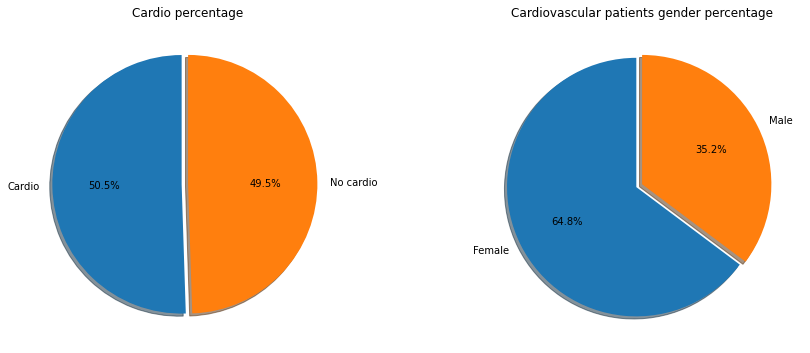

In [18]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

Conclusion of the charts,
The percentage of people with cardiovascular diseases is 50%.
The percentage of males with cardiovascular diseases is 35.3%.
The percentage of females with cardiovascular diseases is 64.7%.

Box plots to compare age and the bmi against the cardio and no-cardio patients.

Text(0.5, 69.0, '')

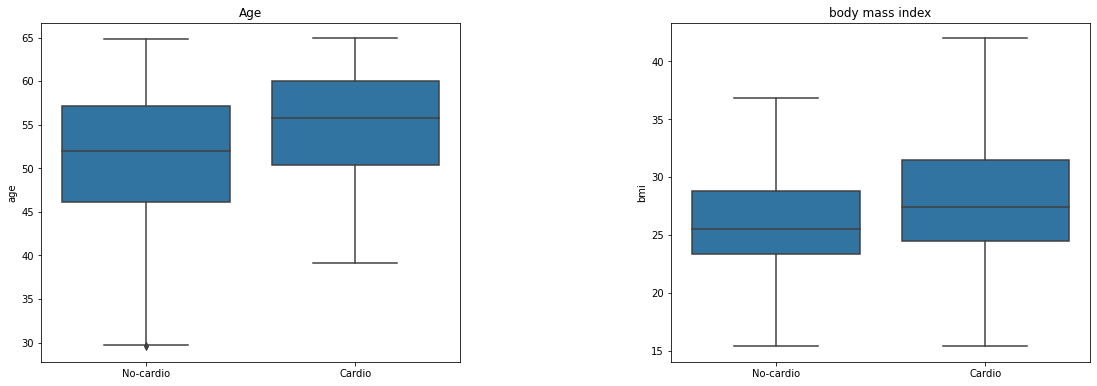

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sns.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sns.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")

Conclusion of the box plots,

1. A relation is found between the age of people and cardiovascular diseases, thus, elderly people are most likely to have this kind of diseases.

2.Another relation is found between the BMI and cardiovascular diseases, thus, people with higher BMI are also most likely to to have this kind of diseases.


Now we search for general relations between the datasets variables.
Gluc is glucose.
Cholesterol is cholesterol value.
Smoke is if a person smokes.
Alco is if a person consumes alcohol.
Active stands for if a person is actively training.
BP is blood pressure.

[Text(153.125, 0.5, 'Cardio Pecentage'),
 Text(153.125, 0.5, 'Cardio Pecentage')]

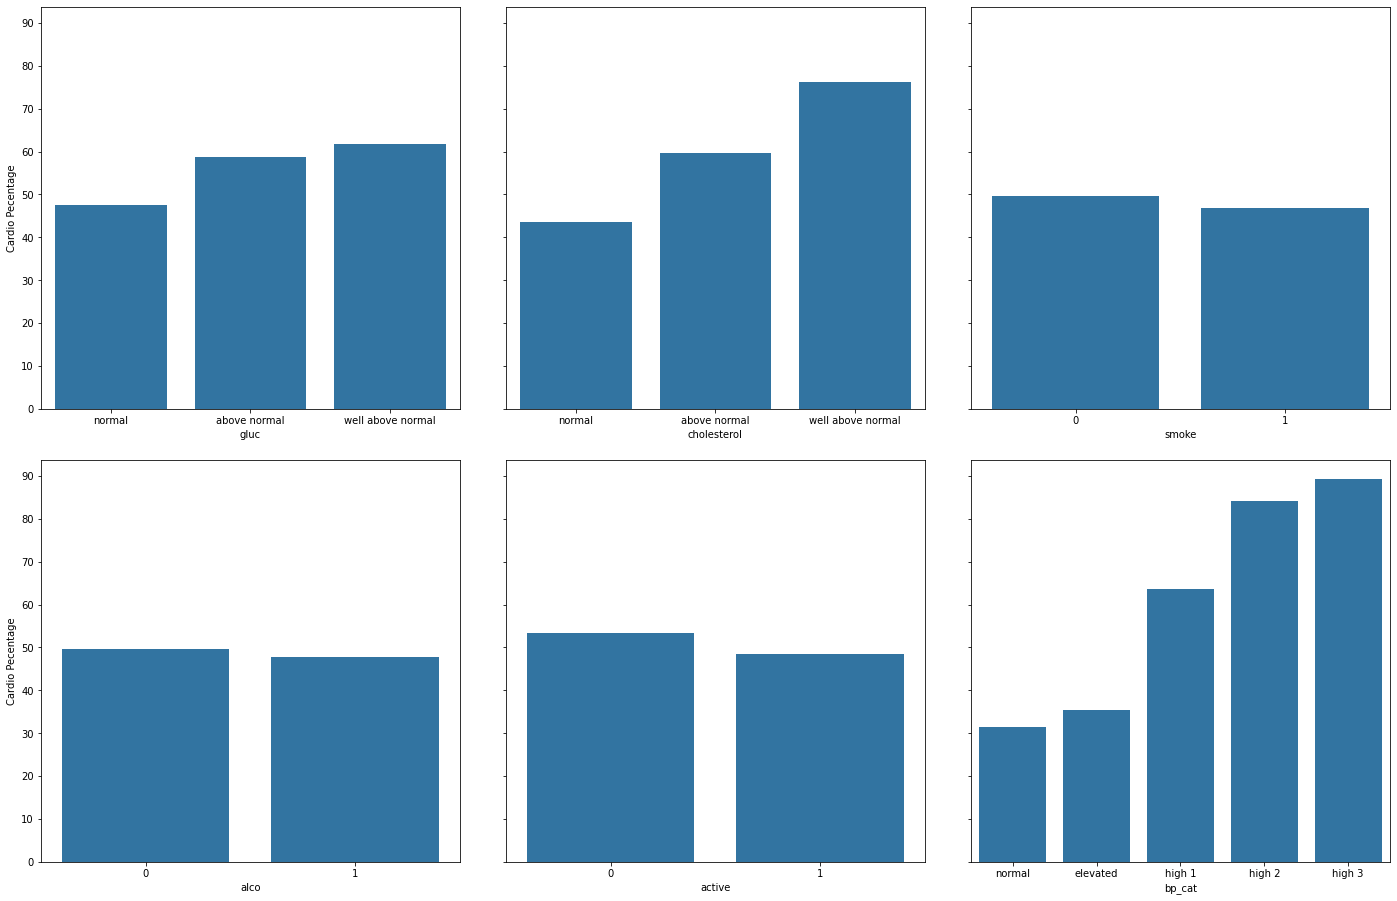

In [20]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sns.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sns.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sns.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sns.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sns.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_cat').mean()
sns.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')

Conclusion:

1.A relation is found between the glucose levels and cardiovascular disease, thus, 60% of people who have well above normal levels of glucose are more likely to have a cardiovascular disease.

2.Another significant relation is found between the cholestrol levels and cardiovascular diseases, thus, higher cholestrol levels means more chance of encountering a cardiovascular disease.

3.We've surprisingly found that there is no strong bonded relationship between smoking and alcohol compared to cardiovascular diseases.

4.A minor relationship is found between being doing sports and activities to cardiovascular diseases as inactive people might develop cardiovascular diseases.

5.A major direct relationship is found between blood pressure and cardiovascular diseases where people who develop high blood pressure levels have the highest chances of having cardiovascular diseases.